In [ ]:
# !pip install deepface

In [1]:
# !unzip ../Age.zip

In [1]:
!pip install keras_vggface

In [2]:
# !pip install keras-vggface

In [3]:
!pip install keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.5 MB/s eta 0:00:00


In [2]:
import keras
keras.__version__

'2.12.0'

In [2]:
# !pip uninstall keras
# !pip install keras==2.12

Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? 
  Successfully uninstalled keras-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import random
import cv2
import os
import tensorflow as tf
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential                       # Functional API 사용 예정.
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.preprocessing import sequence, image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.applications import mobilenet             # 비교적 작은 크기의 모형.
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from deepface.basemodels import VGGFace
warnings.filterwarnings('ignore')                               # Turn the warnings off.
%matplotlib inline

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
os.chdir('/content/drive/MyDrive/TensorFlow/99. Project/Face_Predict')

In [6]:
from keras_vggface.vggface import VGGFace

In [7]:
# train_race_datagen = ImageDataGenerator()
# test_race_datagen = ImageDataGenerator()

In [8]:
!pwd

/content/drive/MyDrive/TensorFlow/99. Project/Face_Predict


In [9]:
os.listdir()

['sample01.ipynb',
 'sample02.ipynb',
 'vgg_face_weights.h5',
 'kaggle.json',
 'UTKFace',
 'data01.csv',
 'Code',
 'keras_vggface',
 '.ipynb_checkpoints',
 'data01_undersampled.csv',
 'data01_undersampled_20.csv',
 'Train_Test_20.zip',
 'Train_Test_All.zip',
 'Test',
 'Train',
 'Test_20',
 'Train_20',
 'Age',
 'Age.zip']

In [10]:
len(os.listdir('./Age'))

10275

In [11]:
df = pd.read_csv('./data01_undersampled.csv')
df

,file_name,age,gender,race,age_cat
0,56_1_0_20170117172544019.jpg.chip.jpg,56,1,0,50
1,50_0_0_20170104212134308.jpg.chip.jpg,50,0,0,50
2,45_0_0_20170111204133863.jpg.chip.jpg,45,0,0,40
3,27_0_0_20170114034255912.jpg.chip.jpg,27,0,0,20
4,26_0_0_20170105183712607.jpg.chip.jpg,26,0,0,20
...,...,...,...,...,...
10270,9_1_2_20161219190524395.jpg.chip.jpg,9,1,2,<20
10271,9_1_2_20161219192342173.jpg.chip.jpg,9,1,2,<20
10272,9_1_2_20161219204347420.jpg.chip.jpg,9,1,2,<20
10273,9_1_2_20170102235115156.jpg.chip.jpg,9,1,2,<20


In [12]:
import cv2

In [13]:
images = []
for name in df['file_name'] :
  img = image.load_img('./Age/' + name, target_size=(224, 224))
  img = image.img_to_array(img)
  # img = cv2.imread('./Age/' + str(name), )
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  images.append(np.array(img))

images = np.array(images)
images.shape

(10275, 224, 224, 3)

In [14]:
y = df['age'].values
y

array([56, 50, 45, ...,  9,  9,  9])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(8220, 224, 224, 3)
(2055, 224, 224, 3)


In [ ]:
# #VGG-Face model
# model = Sequential()
# model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(Conv2D(4096, (7, 7), activation='relu'))
# model.add(Dropout(0.5))
# model.add(Conv2D(4096, (1, 1), activation='relu'))
# model.add(Dropout(0.5))
# model.add(Conv2D(2622, (1, 1)))
# model.add(Flatten())
# model.add(Activation('softmax'))

In [ ]:
# model.summary()

In [ ]:
# model.load_weights('./vgg_face_weights.h5')

In [ ]:
# model.layers[-4].output

In [ ]:
# for layer in model.layers[:-7] :
#   layer.trainable = False


In [ ]:
# model.layers[-4].output

In [ ]:
# model.input

In [16]:
vggface = VGGFace(model='vgg16', include_top=False, input_shape=(224, 224, 3),
                  pooling='avg')

In [17]:
vggface.trainable = False

In [18]:
vggface.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [19]:
output_layer = vggface.get_layer('pool5').output
x = Flatten(name='Flatten')(output_layer)
x = Dense(units=512, activation='relu', name='Dense-1')(x)

x = Dropout(rate=0.7, name='Dropout-1')(x)
x = Dense(units=256, activation='relu', name='Dense-2')(x)

# x = Dropout(rate=0.5, name='Dropout-2')(x)
# x = Dense(units=128, activation='relu', name='Dense-3')(x)

x = Dense(units=1, activation='linear', name='Output')(x)

model_age = Model(inputs=vggface.input, outputs=x)

In [20]:
# # output = Sequential()
# # input = Input([224, 224, 3], dtype=tf.float32, name='Input')
# output = Sequential()
# output = Conv2D(2, (1, 1), name='Prediction')(model.layers[-4].output)
# output = Flatten(name='Flatten')(output)
# output = Dense(units=512, activation='relu', name='Dense-1')(output)
# output = Dropout(rate=0.5, name='Dropout')(output)
# output = Dense(units=1, activation='sigmoid', name='Output')(output)

# model_gender = Model(inputs=model.input, outputs=output)

In [21]:
model_age.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

In [ ]:
# from keras_vggface import utils

In [29]:
# Hyperparameters.
n_epochs = 200
batch_size = 32
learn_rate = 0.0001

In [30]:
optimizer = Adam(learning_rate=learn_rate)
model_age.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

In [31]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
check_point = ModelCheckpoint(filepath='./Code/CheckPoint/age_{epoch:02d}_{val_loss:.3f}.h5',
                              monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [32]:
os.listdir()

['sample01.ipynb',
 'sample02.ipynb',
 'vgg_face_weights.h5',
 'kaggle.json',
 'UTKFace',
 'data01.csv',
 'Code',
 'keras_vggface',
 '.ipynb_checkpoints',
 'data01_undersampled.csv',
 'data01_undersampled_20.csv',
 'Train_Test_20.zip',
 'Train_Test_All.zip',
 'Test',
 'Train',
 'Test_20',
 'Train_20',
 'Age',
 'Age.zip']

In [ ]:
summary = model_age.fit(X_train, y_train,
                        epochs=n_epochs, validation_split=0.2,
                        verbose=1, callbacks=[early_stop, check_point])

In [ ]:
# summary.history['val_loss']

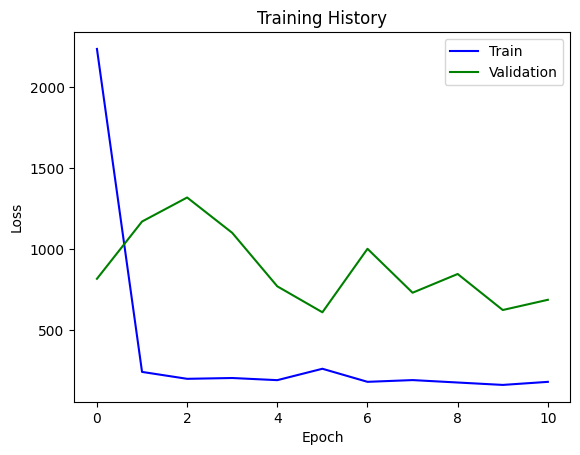

In [28]:
# 학습 history 출력.
n_skip = 0                 # Skip the first few steps.
plt.plot(summary.history['loss'][n_skip:], c="b")
plt.plot(summary.history['val_loss'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# model_gender.evaluate(test_gender_generator, verbose=0)

In [ ]:
# 최종적으로 정확도 계산.
# ACC = model_race.evaluate(, verbose=0)[1]
# print("Test Accuracy : {}".format(np.round(ACC, 3)))

Test Accuracy : 0.841


In [ ]:
# def loadImage(filepath):
#   test_img = image.load_img(filepath, target_size=(224, 224))
#   test_img = image.img_to_array(test_img)
#   test_img = np.expand_dims(test_img, axis = 0)
#   test_img /= 255
#   return test_img

class_race_inv = {v:k for k,v in class_race.items()}

0